In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import wradlib as wrl
import datetime
from pyproj import Transformer
from osgeo import osr


In [2]:
DIR_data = 'F:/CAPPI/'
# DIR_data = 'C:/Users/sverrirhd/OneDrive/CAPPI/'

In [3]:
urls_cappi = glob(DIR_data + 'CAPPI*')
urls_descr = glob(DIR_data + 'descriptive_data*')
urls_probl = glob(DIR_data + 'problematic_indexes*')
urls_urls = glob(DIR_data + 'urls*')

In [4]:
df_file_urls = pd.DataFrame([urls_cappi,urls_descr,urls_probl,urls_urls]).T
df_file_urls.columns = ['CAPPI','descriptive_data','problematic_indexes','urls']

In [5]:
df_file_urls

,CAPPI,descriptive_data,problematic_indexes,urls
0,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_201501...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls201501.npy
1,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_201502...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls201502.npy
2,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_201503...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls201503.npy
3,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_201504...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls201504.npy
4,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_201505...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls201505.npy
...,...,...,...,...
70,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_202008...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls202008_h...
71,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_202009...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls202009_h...
72,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_202010...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls202010_h...
73,C:/Users/sverrirhd/OneDrive/CAPPI\CAPPI_202011...,C:/Users/sverrirhd/OneDrive/CAPPI\descriptive_...,C:/Users/sverrirhd/OneDrive/CAPPI\problematic_...,C:/Users/sverrirhd/OneDrive/CAPPI\urls202011_h...


In [6]:
cappi_test_0 = np.load(df_file_urls.loc[0,'CAPPI'])
cappi_test_1 = np.load(df_file_urls.loc[1,'CAPPI'])
cappi_test_2 = np.load(df_file_urls.loc[21,'CAPPI'])
cappi_test_3 = np.load(df_file_urls.loc[22,'CAPPI'])

cappi_test_same_1 = np.load(df_file_urls.loc[36,'CAPPI'])
cappi_test_same_2 = np.load(df_file_urls.loc[37,'CAPPI'])

descr_test_0 = np.load(df_file_urls.loc[0,'descriptive_data'],allow_pickle=True).item()
descr_test_1 = np.load(df_file_urls.loc[1,'descriptive_data'],allow_pickle=True).item()
descr_test_2 = np.load(df_file_urls.loc[21,'descriptive_data'],allow_pickle=True).item()
descr_test_3 = np.load(df_file_urls.loc[22,'descriptive_data'],allow_pickle=True).item()

descr_test_same_1 = np.load(df_file_urls.loc[36,'descriptive_data'],allow_pickle=True).item()
descr_test_same_2 = np.load(df_file_urls.loc[37,'descriptive_data'],allow_pickle=True).item()

urls_test_same_1 = np.load(df_file_urls.loc[36,'urls'],allow_pickle=True)
urls_test_same_2 = np.load(df_file_urls.loc[37,'urls'],allow_pickle=True)

In [7]:
import wradlib as wrl
raw1 = wrl.io.read_generic_hdf5('C:/Users/sverrirhd/vedurgogn//radar\\201801\\NORPOL240_MIDNESHE_00_5_20180101_0025_O.H5')
raw2 = wrl.io.read_generic_hdf5('C:/Users/sverrirhd/vedurgogn//radar\\201801\\2018010100250000dBZ.vol.hdf5')

In [8]:
raw1['scan1/what'],raw2['dataset1/data1/what']

({'attrs': {'gain': 0.4,
   'nodata': 255.0,
   'offset': -30.0,
   'product': b'SCAN',
   'quantity': b'DBZ',
   'startdate': b'20180101',
   'starttime': b'003115',
   'stopdate': b'20180101',
   'stoptime': b'003145',
   'undetect': 0.0}},
 {'attrs': {'gain': 0.5,
   'nodata': -1.0,
   'offset': -32.0,
   'quantity': b'DBZH',
   'undetect': 0.0}})

In [9]:
raw2.keys()

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/how', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/how', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/how', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/how', 'dataset12/what', 'dataset12/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/how', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/how', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/how', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/how', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/how', 'dataset6/what', 'dataset6/where', 'dataset7/data1/data', 'dataset7/data1/what', 'dataset7/how', 'dataset7/what', 'dataset7/where', 'dat

In [10]:
urls_test_same_1[1][0],urls_test_same_2[1]


('C:/Users/sverrirhd/vedurgogn//radar\\201801\\NORPOL240_MIDNESHE_00_5_20180101_0025_O.H5',
 array(['C:/Users/sverrirhd/vedurgogn//radar\\201801\\2018010100250000dBZ.vol.hdf5'],
       dtype=object))

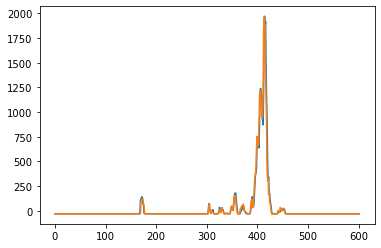

In [11]:
plt.plot(cappi_test_same_1[1].sum(axis=1)*0.4 - 30)
plt.plot(cappi_test_same_2[1].sum(axis=1)*0.5 - 32)
plt.show()

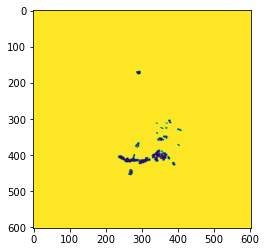

In [51]:
plt.imshow(cappi_test_same_1[1] == cappi_test_same_2[1])
plt.show()

# Images

In [ ]:
URL_imgs = './images/cappi_samples/'

for i in range(100,900):
    f,axes = plt.subplots(2,2,figsize=(12,12))
    axes = axes.ravel()
    axes[0].imshow(cappi_test_0[i])
    axes[1].imshow(cappi_test_1[i])
    axes[2].imshow(cappi_test_2[i])
    axes[3].imshow(cappi_test_3[i])
    plt.savefig(f'{URL_imgs}samples_{i}.png')

# Cross-section

In [ ]:
CAPPI_list = []
for i in range(24):
    CAPPI = np.load(urls_cappi[i])
    CAPPI_list.append(CAPPI)
CAPPI_tensor = np.concatenate(CAPPI_list)
del CAPPI_list
# del CAPPI_tensor

In [ ]:
random_number = np.random.choice(range(len(CAPPI_tensor)))
random_image = CAPPI_tensor[random_number]
plt.imshow(random_image)

In [ ]:
plt.hist(CAPPI_tensor[:,200:280,200:280].ravel(),bins = range(255))
plt.yscale('log')
plt.show()

In [ ]:
arbitrary_pixel = CAPPI_tensor[:,250,250]

f,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.ravel()
axes[0].plot(arbitrary_pixel)

axes[1].hist(arbitrary_pixel,bins = range(255))
axes[1].set_yscale('log')


plt.show()